# Python Netflix Dataset

Analyze a Netflix Movies and TV shows Dataset 

In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [85]:
netflix_data = pd.read_csv("archive.zip")
netflix_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


### Loading, Inspecting and Cleaning the dataset

Using functions such as .info(), .describe(), .rename(), etc...

In [86]:
netflix_data.info()
#making sure that numeric columns are typed as int64 and that descriptive columns are of type object
#keep in mind that rating means age rating and duration is in terms of seasons or minutes (TV show or movie respectively)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [87]:
netflix_data["rating"].describe()

count      8803
unique       17
top       TV-MA
freq       3207
Name: rating, dtype: object

In [88]:
netflix_data["rating"].value_counts(normalize = True)

rating
TV-MA       0.364308
TV-14       0.245371
TV-PG       0.098035
R           0.090765
PG-13       0.055663
TV-Y7       0.037942
TV-Y        0.034874
PG          0.032603
TV-G        0.024991
NR          0.009088
G           0.004658
TV-Y7-FV    0.000682
NC-17       0.000341
UR          0.000341
74 min      0.000114
84 min      0.000114
66 min      0.000114
Name: proportion, dtype: float64

In [89]:
column_mapper = {"rating": "age_rating", "listed_in": "genre"}
netflix_data = netflix_data.rename(
    mapper = column_mapper,
    axis = 1
)
netflix_data["title"].str.title()
netflix_data.head()
#checking the renamed columns 

,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Data Preparation

In [90]:
pivoted_data = pd.pivot_table(netflix_data, index = ["title"], values = ["release_year"])
print(pivoted_data)
pivoted_data["release_year"].value_counts()

                               release_year
title                                      
#Alive                               2020.0
#AnneFrank - Parallel Stories        2019.0
#FriendButMarried                    2018.0
#FriendButMarried 2                  2020.0
#Roxy                                2018.0
...                                     ...
忍者ハットリくん                             2012.0
海的儿子                                 2016.0
마녀사냥                                 2015.0
반드시 잡는다                              2017.0
최강전사 미니특공대 : 영웅의 탄생                  2018.0

[8807 rows x 1 columns]


release_year
2018.0    1147
2017.0    1032
2019.0    1030
2020.0     953
2016.0     902
          ... 
1925.0       1
1961.0       1
1947.0       1
1959.0       1
1966.0       1
Name: count, Length: 74, dtype: int64

### Data Analysis and Visualizations

answering questions related to the data to find optimized solutions/answers

In [92]:
year_of_release = netflix_data["release_year"].value_counts()

In [104]:
release_year_data = netflix_data["release_year"].value_counts().rename_axis('unique_values').reset_index(name='counts')
print(release_year_data)

#Netflix has most movies and shows from 2018 than other years

    unique_values  counts
0            2018    1147
1            2017    1032
2            2019    1030
3            2020     953
4            2016     902
..            ...     ...
69           1959       1
70           1925       1
71           1961       1
72           1947       1
73           1966       1

[74 rows x 2 columns]


the bar graph shown plotting the release year against the number of movies/shows there are that year is a left-skewed unimodal dataset


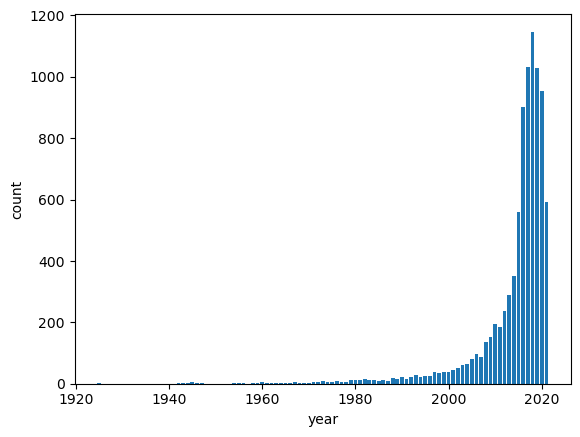

In [113]:
plt.bar(release_year_data["unique_values"], release_year_data["counts"])
plt.xlabel("year")
plt.ylabel("count")
print("the bar graph shown plotting the release year against the number of movies/shows there are that year is a left-skewed unimodal dataset")
#left skewed dataset

In [111]:
average_year_release = np.mean(netflix_data["release_year"])
earliest_year_release = np.min(netflix_data["release_year"])
latest_year_release = np.max(netflix_data["release_year"])
print("the average year of release is "+ str(int(average_year_release)))
print("the earliest year of release is " + str(earliest_year_release))
print("the latest year of release is " + str(latest_year_release))

the average year of release is 2014
the earliest year of release is 1925
the latest year of release is 2021


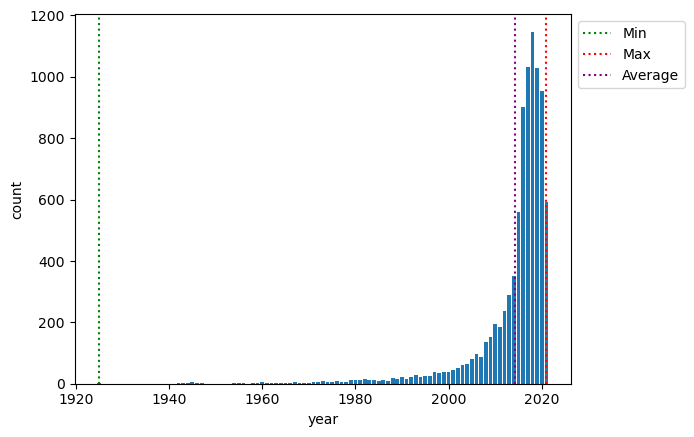

In [129]:
plt.bar(release_year_data["unique_values"], release_year_data["counts"])
plt.xlabel("year")
plt.ylabel("count")
plt.axvline(earliest_year_release, 0, 1, linestyle = "dotted", color = "green", label = "Min")
plt.axvline(latest_year_release, 0, 1, linestyle = "dotted", color = "red", label = "Max")
plt.axvline(average_year_release, 0, 1, linestyle = "dotted", color = "Purple", label = "Average")
plt.legend(bbox_to_anchor = (1,1))